In [1]:
import json
import pandas as pd

In [2]:
with open('P1- BankStatements.json') as file:
    data = json.load(file)

In [3]:
print(data)

{'Account': {'type': 'deposit', 'maskedAccNumber': 'XXXX6461', 'version': '1.1', 'linkedAccRef': '02f28b8d-d8a3-43d7-88c6-5fabb2e51541', 'xmlns': 'http://api.rebit.org.in/FISchema/deposit', 'xsi:schemaLocation': 'http://api.rebit.org.in/FISchema/deposit.xsd', 'xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance', 'Profile': {'Holders': {'type': 'SINGLE', 'Holder': {'name': 'Arun Shakya', 'dob': '2000-06-09', 'mobile': '8429489761', 'nominee': 'REGISTERED', 'address': '', 'email': 'NA', 'pan': 'FORM60', 'ckycCompliance': 'true'}}}, 'Summary': {'currentBalance': '761.41', 'currency': 'INR', 'exchgeRate': '1', 'balanceDateTime': '2024-05-30T03:05:12+05:30', 'type': 'SAVINGS', 'branch': 'AMETHI JADID, UP', 'ifscCode': 'BARB0AMEJAD', 'micrCode': '209012004', 'openingDate': '2020-11-24', 'currentODLimit': '0.00', 'drawingLimit': '0.00', 'status': 'ACTIVE', 'Pending': {'amount': '0.0'}}, 'Transactions': {'startDate': '2023-05-31', 'endDate': '2024-05-30', 'Transaction': [{'type': 'DEBIT', 

# 1. Transaction analysis

In [4]:
transactions = data['Account']['Transactions']['Transaction']

In [5]:
transactions

[{'type': 'DEBIT',
  'mode': 'CARD',
  'amount': '100.0',
  'currentBalance': '2180.80',
  'transactionTimestamp': '2023-06-27T09:40:19+05:30',
  'valueDate': '2023-06-27',
  'txnId': 'S39488701',
  'narration': 'PRCR/MS NEHA FILLING STATIO/FARRUKHAB',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'CARD',
  'amount': '170.0',
  'currentBalance': '2010.80',
  'transactionTimestamp': '2023-06-28T09:51:57+05:30',
  'valueDate': '2023-06-28',
  'txnId': 'S76862822',
  'narration': 'PRCR/MS NEHA FILLING STATIO/FARRUKHAB',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'CARD',
  'amount': '500.0',
  'currentBalance': '1510.80',
  'transactionTimestamp': '2023-07-26T10:04:00+05:30',
  'valueDate': '2023-07-26',
  'txnId': 'S31451661',
  'narration': 'PRCR/MS NEHA FILLING STATIO/FARRUKHAB',
  'reference': 'NA'},
 {'type': 'CREDIT',
  'mode': 'OTHERS',
  'amount': '15.0',
  'currentBalance': '1525.80',
  'transactionTimestamp': '2023-08-06T11:10:38+05:30',
  'valueDate': '2023-07-31',


### a.Total number of transactions

In [6]:
total_transactions=len(transactions)

In [7]:
print(total_transactions)

985


### b.distribution of transaction amounts(small vs large)

In [8]:
debit_count=0
credit_count=0
debit_amounts=[]
credit_amounts=[]

In [9]:
for transaction in transactions:
    amount=float(transaction['amount'])
    if transaction['type']=='DEBIT':
        debit_count+=1
        debit_amounts.append(amount)
    elif transaction['type']=='CREDIT':
        credit_count+=1
        credit_amounts.append(amount)

In [10]:
all_amount=debit_amounts+credit_amounts
median_amount=sorted(all_amount)[len(all_amount) //2]
small_transactions=[amt for amt in all_amount if amt<=median_amount]
large_transactions=[amt for amt in all_amount if amt>median_amount]

In [11]:
print(len(small_transactions),len(large_transactions))


495 490


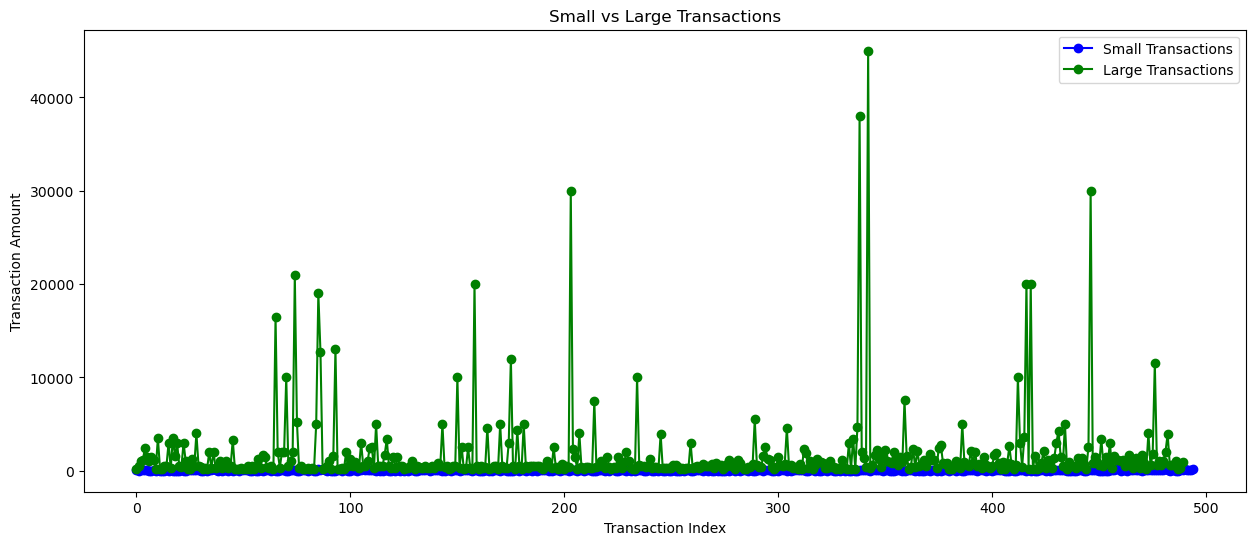

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(small_transactions, marker='o', color='blue', label='Small Transactions')
plt.plot(large_transactions, marker='o', color='green', label='Large Transactions')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.title('Small vs Large Transactions')
plt.legend()
plt.show()

### c.frequency of different transaction types

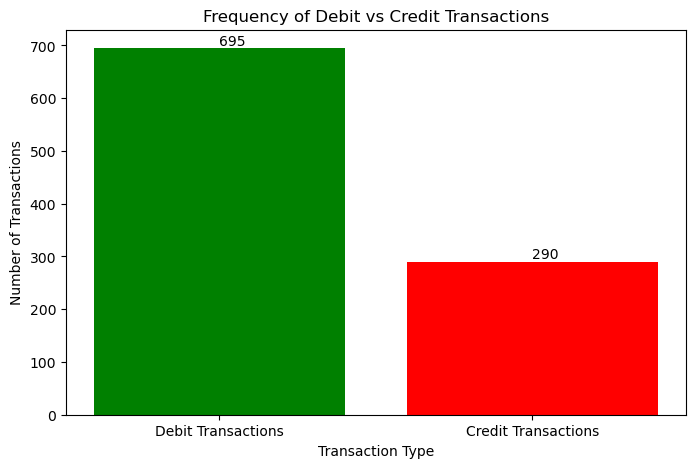

In [13]:
total_debit = len(debit_amounts)
total_credit = len(credit_amounts)

plt.figure(figsize=(8, 5))
labels = ['Debit Transactions', 'Credit Transactions']
counts = [total_debit, total_credit]
bars=plt.bar(labels, counts, color=['green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')

plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Frequency of Debit vs Credit Transactions')
plt.show()

# 2.Balance analysis

### a.Trend of account balance over time

### b.periods with significant changes in balance

In [14]:
import pandas as pd
transaction_time=[txn['transactionTimestamp'] for txn in transactions]
balances=[float(txn['currentBalance']) for txn in transactions]

transaction_data=pd.DataFrame({
    'Time':pd.to_datetime(transaction_time),
    'balance':balances
})


transaction_data.sort_values(by='Time',inplace=True)
print(transaction_data)

                         Time  balance
0   2023-06-27 09:40:19+05:30  2180.80
1   2023-06-28 09:51:57+05:30  2010.80
2   2023-07-26 10:04:00+05:30  1510.80
3   2023-08-06 11:10:38+05:30  1525.80
4   2023-08-07 17:13:13+05:30   525.80
..                        ...      ...
980 2024-05-29 17:57:40+05:30    23.41
981 2024-05-30 05:07:05+05:30   961.41
982 2024-05-30 09:58:24+05:30   901.41
983 2024-05-30 13:30:30+05:30   771.41
984 2024-05-30 13:38:20+05:30   761.41

[985 rows x 2 columns]


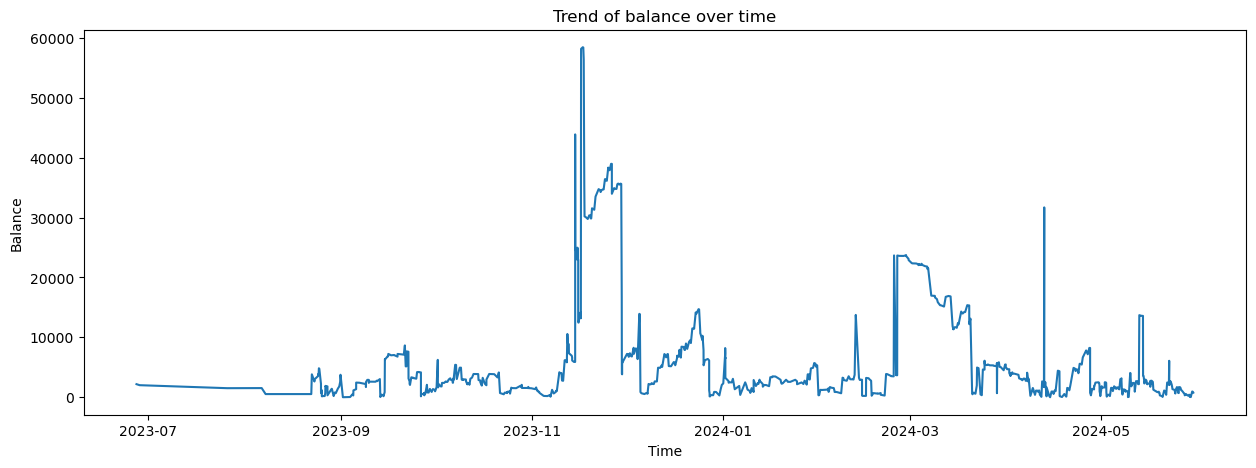

In [15]:
plt.figure(figsize=(15,5))
plt.plot(transaction_data['Time'],transaction_data['balance'])
plt.title('Trend of balance over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.show()

# 3.Spending Patterns

### a.Categories of expenses

In [16]:
categories=[txn['narration'] for txn in transactions]
amounts=[float(txn['amount']) for txn in transactions]
tran_type=[txn['type'] for txn in transactions]

spend_data=pd.DataFrame({
    'category':categories,
    'amount':amounts,
    'type':tran_type
})

spend_data.head()

,category,amount,type
0,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,100.0,DEBIT
1,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,170.0,DEBIT
2,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,500.0,DEBIT
3,51888100006461IntPd01-05-2023 to 31-07-2023,15.0,CREDIT
4,ATM/CASH/321917012791/XXXXXXXXXXXX8896,1000.0,DEBIT


In [17]:
spend_data['category_type']=spend_data['category'].apply(lambda x:x.split("/")[0].split('-')[0])
spend_data.head()

,category,amount,type,category_type
0,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,100.0,DEBIT,PRCR
1,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,170.0,DEBIT,PRCR
2,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,500.0,DEBIT,PRCR
3,51888100006461IntPd01-05-2023 to 31-07-2023,15.0,CREDIT,51888100006461IntPd01
4,ATM/CASH/321917012791/XXXXXXXXXXXX8896,1000.0,DEBIT,ATM


In [18]:
spend_data.drop(columns=['category'],inplace=True)

In [19]:
spend_data.head()

,amount,type,category_type
0,100.0,DEBIT,PRCR
1,170.0,DEBIT,PRCR
2,500.0,DEBIT,PRCR
3,15.0,CREDIT,51888100006461IntPd01
4,1000.0,DEBIT,ATM


In [20]:
expense_data=spend_data[spend_data['type']=='DEBIT']

In [21]:
unique_category_types = expense_data['category_type'].unique()
print("Unique Category Types:", unique_category_types)

Unique Category Types: ['PRCR' 'ATM' 'UPI']


#### The main categories are ['PRCR', 'ATM' ,'UPI']

### b.Amount of spending in each category

As the spending is done only on the debit purpose we filter all the debit transactions

In [22]:
expense_data=spend_data[spend_data['type']=='DEBIT']

expense_summary=expense_data.groupby('category_type').agg(total_amount=('amount','sum'),transaction_count=('amount','size')).reset_index()
expense_summary=expense_summary.sort_values(by='transaction_count',ascending=False)

expense_summary.head()


,category_type,total_amount,transaction_count
2,UPI,407759.9,688
1,PRCR,830.0,4
0,ATM,13500.0,3


# 4.Income analysis

a.sources of income

In [23]:
expense_data=spend_data[spend_data['type']=='CREDIT']

expense_summary=expense_data.groupby('category_type').agg(total_amount=('amount','sum'),transaction_count=('amount','size')).reset_index()
expense_summary=expense_summary.sort_values(by='transaction_count',ascending=False)

expense_summary.head(500)


,category_type,total_amount,transaction_count
3,NEFT,172430.51,159
4,UPI,179333.00,101
2,IMPS,23672.00,25
0,51888100006461IntPd01,135.00,4
1,BY CASH,45000.00,1


### b.pattern in timing and income received

In [24]:
data = pd.DataFrame(transactions)
expense_data = data[data['type'] == 'CREDIT']

transaction_time = pd.to_datetime(expense_data['transactionTimestamp'])
income_received = expense_data['amount'].astype(float)

transaction_data = pd.DataFrame({
    'Time': transaction_time,
    'income received': income_received
})
transaction_data.sort_values(by='Time', inplace=True)
transaction_data.head()

,Time,income received
3,2023-08-06 11:10:38+05:30,15.0
6,2023-08-22 11:49:13+05:30,3000.0
7,2023-08-22 12:20:04+05:30,300.0
9,2023-08-23 10:51:21+05:30,400.0
10,2023-08-24 11:32:18+05:30,500.0


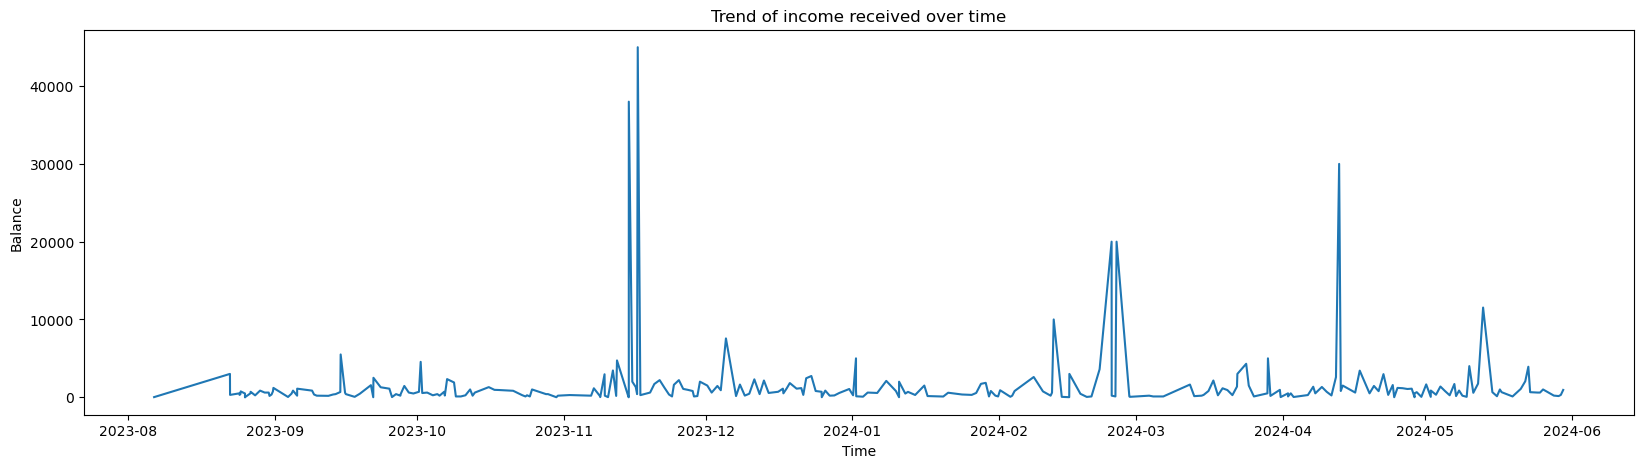

In [25]:
plt.figure(figsize=(20,5))
plt.plot(transaction_data['Time'],transaction_data['income received'])
plt.title('Trend of income received over time')
plt.xlabel('Time')
plt.ylabel('Balance')
plt.show()

# 5.Alert generation

In [26]:
high_amount_threshold = 30000 
suspicious_transactions = [txn for txn in transactions if float(txn['amount']) >= high_amount_threshold ]


In [27]:
len(suspicious_transactions)

4

In [28]:
suspicious_transactions

[{'type': 'CREDIT',
  'mode': 'UPI',
  'amount': '37999.0',
  'currentBalance': '43892.80',
  'transactionTimestamp': '2023-11-14T18:31:11+05:30',
  'valueDate': '2023-11-14',
  'txnId': 'S65593249',
  'narration': 'UPI/331812106847/183112/UPI/311999sshuklaaxl/P',
  'reference': 'NA'},
 {'type': 'CREDIT',
  'mode': 'CASH',
  'amount': '45000.0',
  'currentBalance': '58180.80',
  'transactionTimestamp': '2023-11-16T15:51:14+05:30',
  'valueDate': '2023-11-16',
  'txnId': '00707977',
  'narration': 'BY CASH',
  'reference': 'NA'},
 {'type': 'CREDIT',
  'mode': 'UPI',
  'amount': '30000.0',
  'currentBalance': '31701.21',
  'transactionTimestamp': '2024-04-12T20:47:44+05:30',
  'valueDate': '2024-04-12',
  'txnId': 'S72310155',
  'narration': 'UPI/410362944187/204745/UPI/8960920752ibl/Paym',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'UPI',
  'amount': '30000.0',
  'currentBalance': '1701.21',
  'transactionTimestamp': '2024-04-12T20:50:06+05:30',
  'valueDate': '2024-04-12',
  't

In [29]:
low_balance_threshold = 100
high_expenditure_threshold = 20000
low_balance_alerts = [txn for txn in transactions if float(txn['currentBalance']) < low_balance_threshold]
high_expenditure_alerts = [txn for txn in transactions if txn['type'] == 'DEBIT' and float(txn['amount']) >= high_expenditure_threshold]


In [30]:
low_balance_alerts

[{'type': 'DEBIT',
  'mode': 'UPI',
  'amount': '3500.0',
  'currentBalance': '0.80',
  'transactionTimestamp': '2023-09-01T10:42:42+05:30',
  'valueDate': '2023-09-01',
  'txnId': 'S73798851',
  'narration': 'UPI/324450376631/104241/UPI/KAYUMTRADERSicici/',
  'reference': 'NA'},
 {'type': 'CREDIT',
  'mode': 'UPI',
  'amount': '34.0',
  'currentBalance': '34.80',
  'transactionTimestamp': '2023-09-03T18:19:09+05:30',
  'valueDate': '2023-09-03',
  'txnId': 'S77153314',
  'narration': 'UPI/361211837275/181909/UPI/8318404822ybl/Paym',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'UPI',
  'amount': '3000.0',
  'currentBalance': '29.80',
  'transactionTimestamp': '2023-09-13T10:19:32+05:30',
  'valueDate': '2023-09-13',
  'txnId': 'S67400576',
  'narration': 'UPI/362228688034/101932/UPI/kayumtradersicici/',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'UPI',
  'amount': '105.0',
  'currentBalance': '86.80',
  'transactionTimestamp': '2023-11-06T20:57:40+05:30',
  'valueDate': 

In [31]:
high_expenditure_alerts

[{'type': 'DEBIT',
  'mode': 'UPI',
  'amount': '21000.0',
  'currentBalance': '35400.80',
  'transactionTimestamp': '2023-11-17T16:34:54+05:30',
  'valueDate': '2023-11-17',
  'txnId': 'S82212459',
  'narration': 'UPI/332126038252/163454/UPI/msjsrfashioneazypa',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'UPI',
  'amount': '20000.0',
  'currentBalance': '3683.91',
  'transactionTimestamp': '2024-02-25T11:08:34+05:30',
  'valueDate': '2024-02-25',
  'txnId': 'S77431539',
  'narration': 'UPI/405633427538/110833/UPI/8318914152axl/UPI',
  'reference': 'NA'},
 {'type': 'DEBIT',
  'mode': 'UPI',
  'amount': '30000.0',
  'currentBalance': '1701.21',
  'transactionTimestamp': '2024-04-12T20:50:06+05:30',
  'valueDate': '2024-04-12',
  'txnId': 'S72445629',
  'narration': 'UPI/446935401186/205005/UPI/shivampandit199999',
  'reference': 'NA'}]